In [1]:
#This file contains codes for question 2.1 and 2.3. In order to run them, you have to run the whole code
#because I loaded the images only once. 
#The matrix multiplication will take very long. I can't upload my saved variables cause CCLE doesn't allow that

In [3]:
#!/usr/bin/python

from os import listdir
from PIL import Image as PImage
import matplotlib.pyplot as plt

imagesList = listdir('images/')
img = PImage.open('images/' + imagesList[0])


In [4]:
import matplotlib.image as img
import numpy as np
import skimage
image = img.imread('images/000001.jpg')
image_file = PImage.open('images/000001.jpg') # open colour image

imagesList = listdir('images/')


In [5]:
train_list = list()
x_train = imagesList[0:800]
for i in range(0,800):
    image = PImage.open('images/' + x_train[i])
    image2 = np.asarray(image)
    train_list.append(image2)


In [6]:
b = np.zeros((16384, 800))
count = 0
for i in imagesList[0:800]:
    
    a = PImage.open('images/' + i)
    a = skimage.color.rgb2hsv(a)
    a = np.asarray(a[:,:,2])
    a = a.flatten()
    b[:,count] = a[:]
    count+=1


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


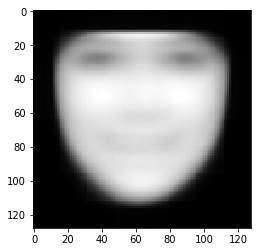

In [7]:
M = np.mean(b,axis = 1)
mean_face = np.reshape(M, [128,128])
plt.imshow(mean_face,cmap = 'gray')

In [8]:
for i in range(0,800):
    b[:,i] = b[:,i] - M


In [9]:
c = np.matmul(b,np.transpose(b))

In [10]:
w,v = np.linalg.eig(c) 

In [11]:
eigen = v[:,0:50]

In [12]:
reconstructed_matrix = np.zeros((16384,200))
for i in range(0,200):
    orig_img_reconstruction =PImage.open('images/' + imagesList[i+800])
    orig_img_reconstruction = skimage.color.rgb2hsv(orig_img_reconstruction)
    orig_img_reconstruction = np.asarray(orig_img_reconstruction[:,:,2])
    orig_img_reconstruction = orig_img_reconstruction.flatten()
    theta3 = orig_img_reconstruction-M
    alpha = np.dot(theta3, eigen)
    for j in range(0,50):
        temp = eigen[:,j].real
        reconstructed_matrix[:,i] += alpha[j].real*(temp)
    reconstructed_matrix[:,i] = reconstructed_matrix[:,i] + M
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

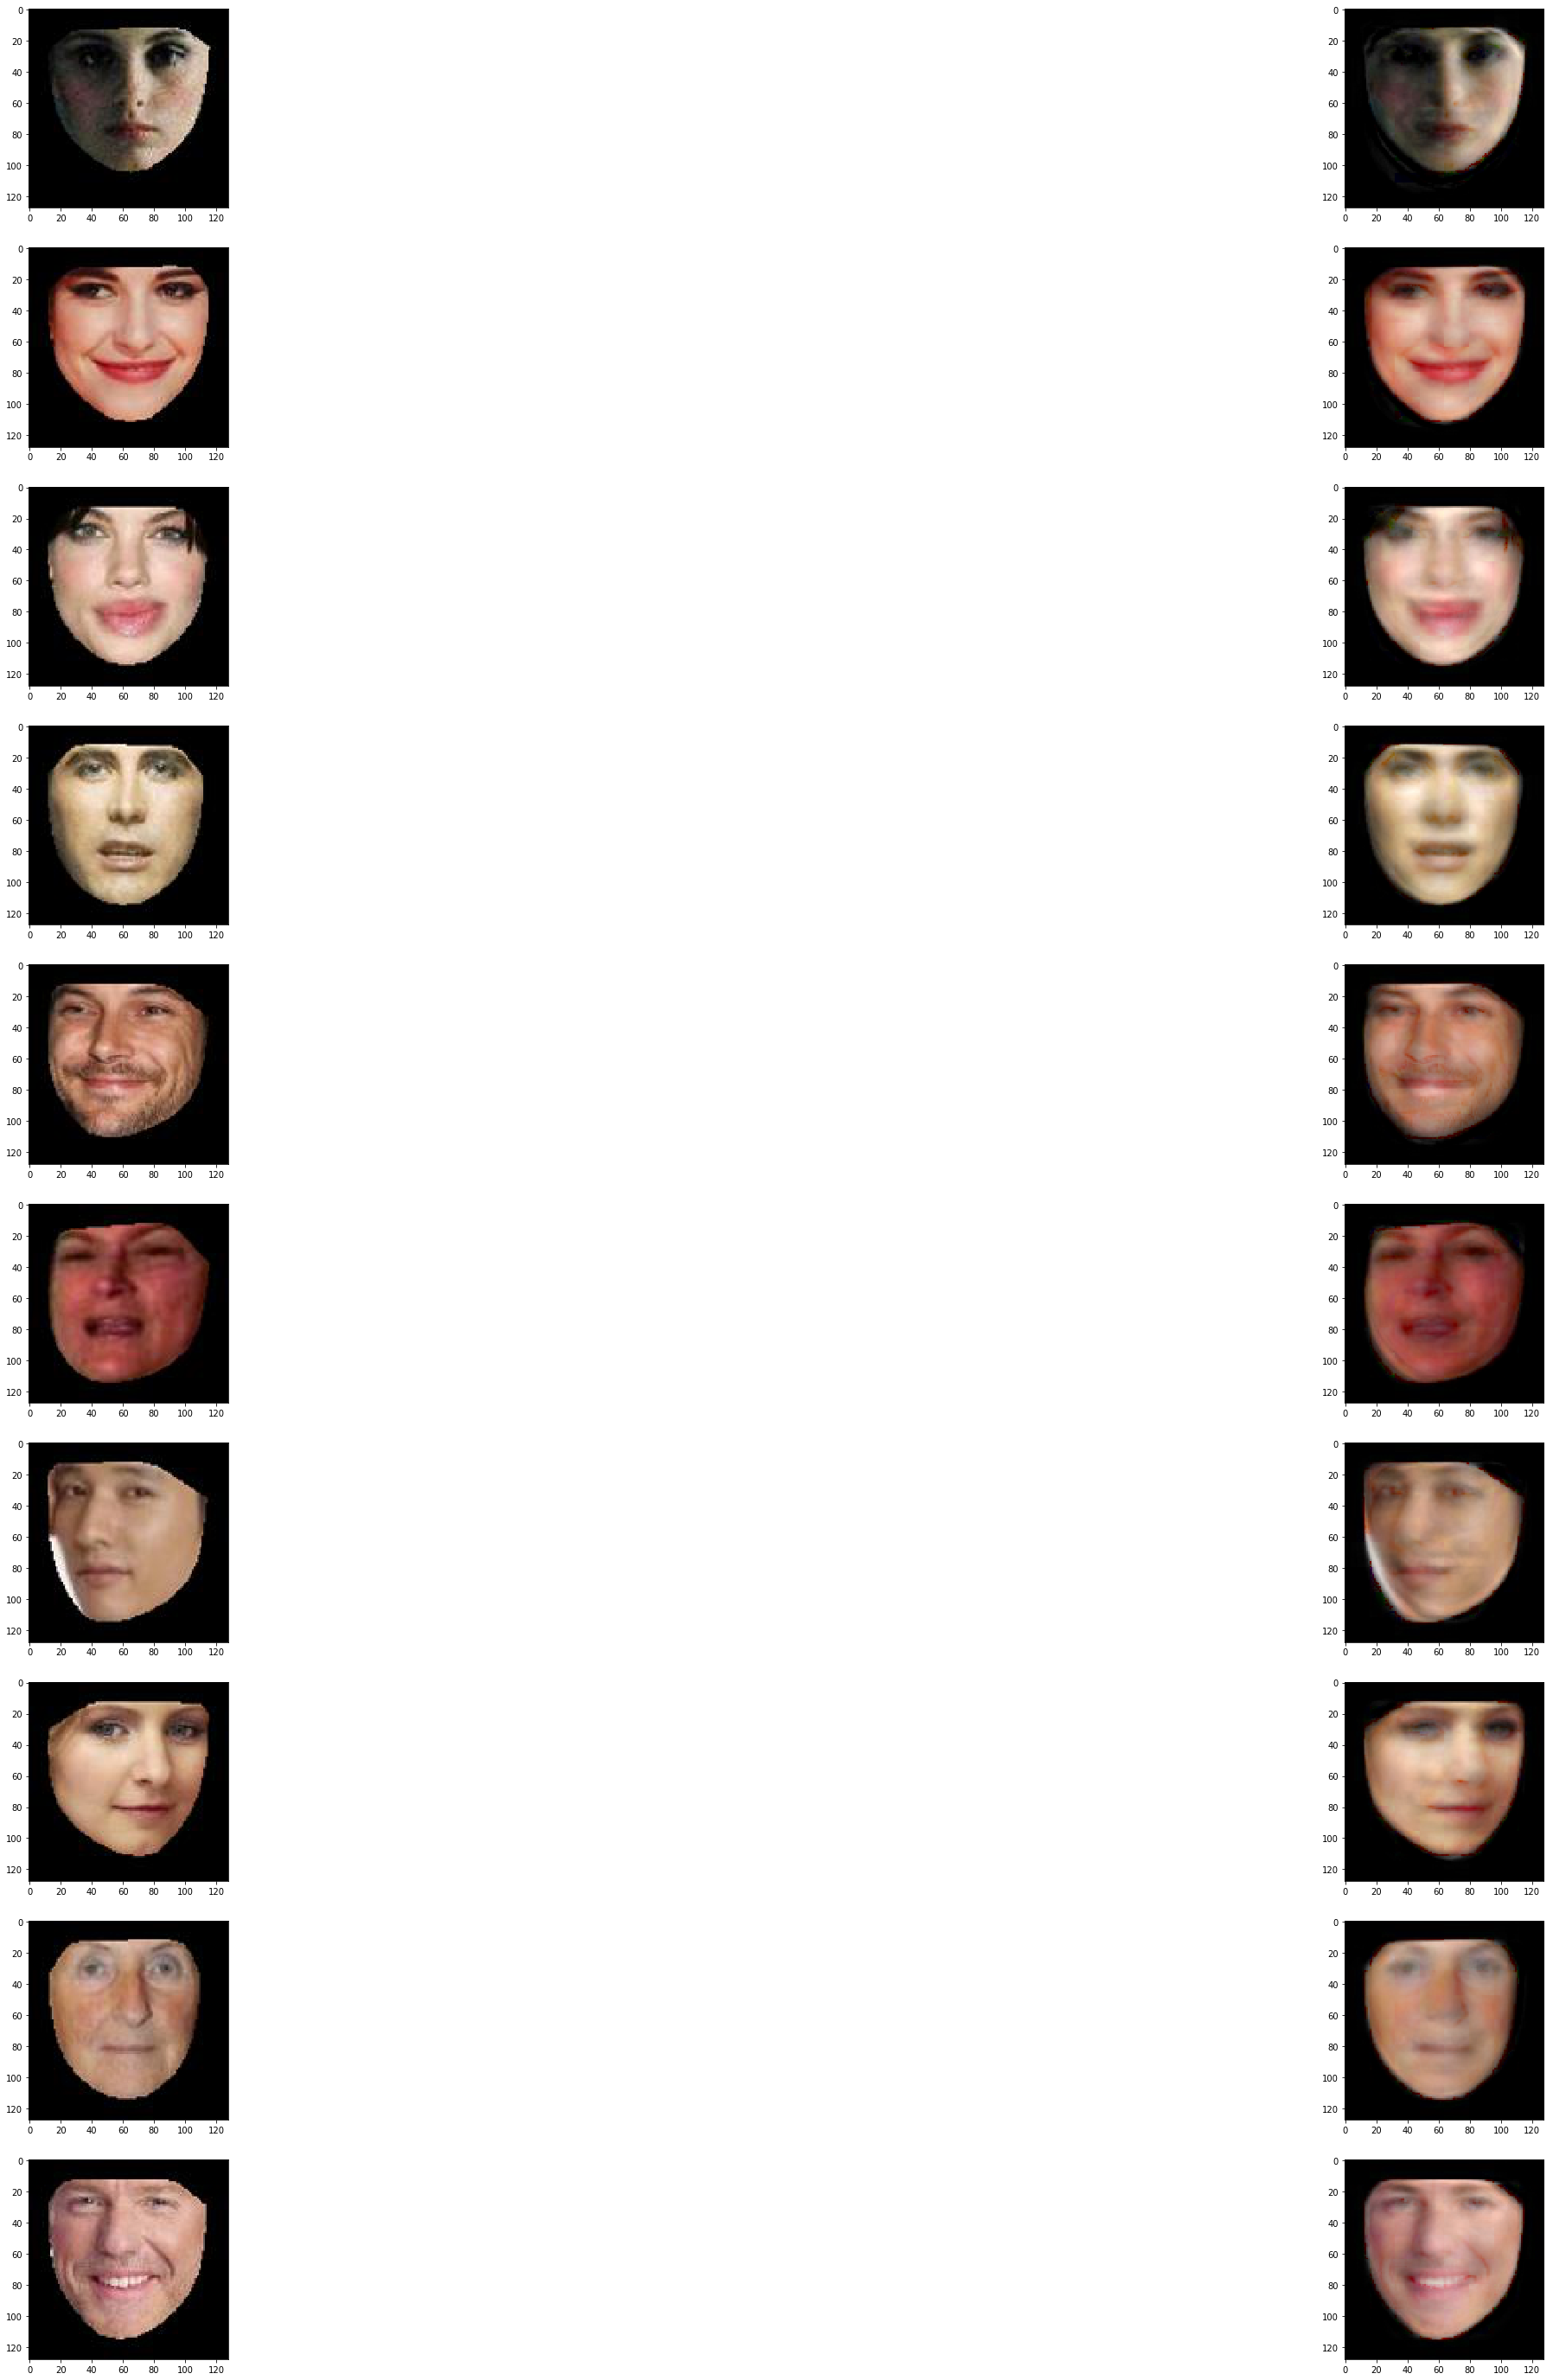

In [13]:
fig=plt.figure(figsize=(50, 50))
count = 1
for i in range(1, 10 +1):
    
    fig.add_subplot(10,2,count)
    test_image = PImage.open('images/' + imagesList[i+799])
    plt.imshow(test_image, cmap='gray')
    count+=1


    rgb_reconstruct = skimage.color.rgb2hsv(test_image)
    rgb_reconstruct[:,:,2] = np.reshape(reconstructed_matrix[:,i-1],[128,128])
    rgb_reconstruct = skimage.color.hsv2rgb(rgb_reconstruct)
    fig.add_subplot(10, 2, count)
    count +=1
    plt.imshow(rgb_reconstruct, cmap='gray')
    

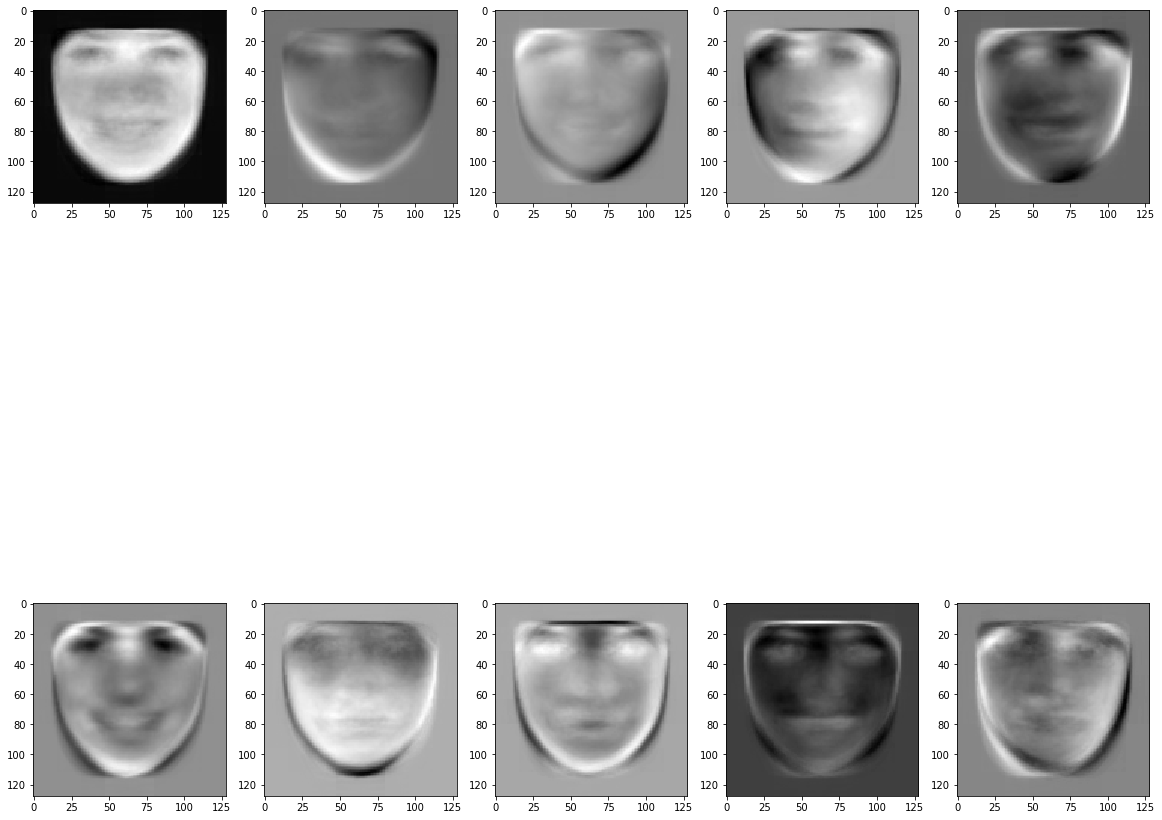

In [14]:
new_array = v[:,0:10]

fig=plt.figure(figsize=(20, 20))
for i in range(1, 10 +1):
   
    plot_image = np.reshape(v[:,i-1], [128,128])
    fig.add_subplot(2, 5, i)
    plt.imshow(plot_image.real, cmap='gray')

    

In [15]:
loss_50 = 0
X_real = np.zeros((16384,200))
for i in range(0,200):
    orig_img_reconstruction = PImage.open('images/' + imagesList[i+800])
    orig_img_reconstruction = skimage.color.rgb2hsv(orig_img_reconstruction)
    orig_img_reconstruction = np.asarray(orig_img_reconstruction[:,:,2])
    orig_img_reconstruction = orig_img_reconstruction.flatten()
    X_real[:,i] = orig_img_reconstruction
    

In [16]:
sample = list(range(0,51,5))
sample[0] +=1
print(sample)
print(eigen.shape)

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
(16384, 50)


In [17]:
loss = list()
reconstructed_matrix = np.zeros((16384,200))

for k in sample:
    count = 0
    eigen = v[:,0:k]
    reconstructed_matrix = np.zeros((16384,200))
    for i in range(0,200):
        orig_img_reconstruction = PImage.open('images/' + imagesList[i+800])
        orig_img_reconstruction = skimage.color.rgb2hsv(orig_img_reconstruction)
        orig_img_reconstruction = np.asarray(orig_img_reconstruction[:,:,2])
        orig_img_reconstruction = orig_img_reconstruction.flatten()
    
        theta3 = orig_img_reconstruction-M
        alpha = np.dot(theta3, eigen)
        for j in range(0,k):
            temp = eigen[:,j].real
            reconstructed_matrix[:,i] += alpha[j].real*(temp)
        reconstructed_matrix[:,i] = reconstructed_matrix[:,i] + M
    temp_loss = X_real - reconstructed_matrix
    temp_loss = np.square(temp_loss)/16384
    loss.append(np.sum(temp_loss)/200)
 

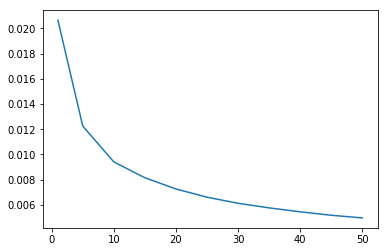

In [18]:
plt.plot(sample, loss)

In [19]:
import scipy.io
mat = scipy.io.loadmat('landmarks/000001.mat')

In [20]:
landmarksList = listdir('landmarks/')

In [21]:
x_train = np.zeros((68,800))
y_train = np.zeros((68,800))
x_test = np.zeros((68, 200))
y_test = np.zeros((68, 200))
for i in range(0,800):
    mat = scipy.io.loadmat('landmarks/' + landmarksList[i])
    x_train[:,i] = mat['lms'][:,0]
    y_train[:,i] = mat['lms'][:,1]
for i in range(0, 200):
    mat = scipy.io.loadmat('landmarks/' + landmarksList[i+800])
    x_test[:,i] = mat['lms'][:,0]
    y_test[:,i] = mat['lms'][:,1]

final_array = np.zeros((136, 800))
final_test_array = np.zeros((136, 200))
for i in range(0, 800):
    mat = scipy.io.loadmat('landmarks/' + landmarksList[i])
    final_array[:,i] = mat['lms'].flatten()
for i in range(0,200):
    mat = scipy.io.loadmat('landmarks/' + landmarksList[i+800])
    final_test_array[:,i] = mat['lms'].flatten()


In [22]:
M_x = np.mean(x_train,axis = 1)
M_y = np.mean(y_train, axis = 1)
M_coordinates = np.mean(final_array, axis=1)

In [23]:
coordinates = np.zeros((136,800))
for i in range(0, 800):

    coordinates[:,i] = final_array[:,i] - M_coordinates

In [24]:
c_x_y = np.matmul(coordinates, np.transpose(coordinates))

In [25]:
w_coordinates, v_coordinates = np.linalg.eig(c_x_y)

In [26]:
theta_coordinates = final_test_array[:,0] - M_coordinates
eigen_coor = v_coordinates[:,0:10]
alpha_coor = np.dot(theta_coordinates, eigen_coor)


In [27]:
recons_10_coor = np.zeros((136,200))

In [28]:
eigen_coor = v_coordinates[:,0:10]

for i in range(0,200):

    theta_coordinates = final_test_array[:,i] - M_coordinates
    alpha_coor = np.dot(theta_coordinates, eigen_coor)
    

    for j in range(0,10):
        temp = eigen_coor[:,j]
        recons_10_coor[:,i] += alpha_coor[j].real*temp
   
    recons_10_coor[:,i] += M_coordinates

In [29]:
sample_1 = list(range(0,51,5))
sample_1[0] +=1
dist_list = list()

In [30]:
for k in sample_1:
    recons_full_coor = np.zeros((136,200))
 
    eigen_coor = v_coordinates[:,0:k]
    for i in range(0,200):

        theta_coordinates = final_test_array[:,i] - M_coordinates
        alpha_coor = np.dot(theta_coordinates, eigen_coor)

        for j in range(0,k):

            temp = eigen_coor[:,j].real

            recons_full_coor[:,i] += alpha_coor[j].real*temp

        recons_full_coor[:,i] += M_coordinates

    dist = np.square(recons_full_coor - final_test_array)
    dist = np.sqrt(dist)

    dist = np.mean(dist)
    
    dist_list.append(dist)

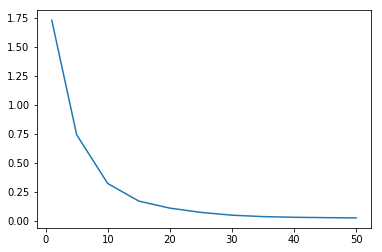

In [31]:
plt.plot(sample_1, dist_list)

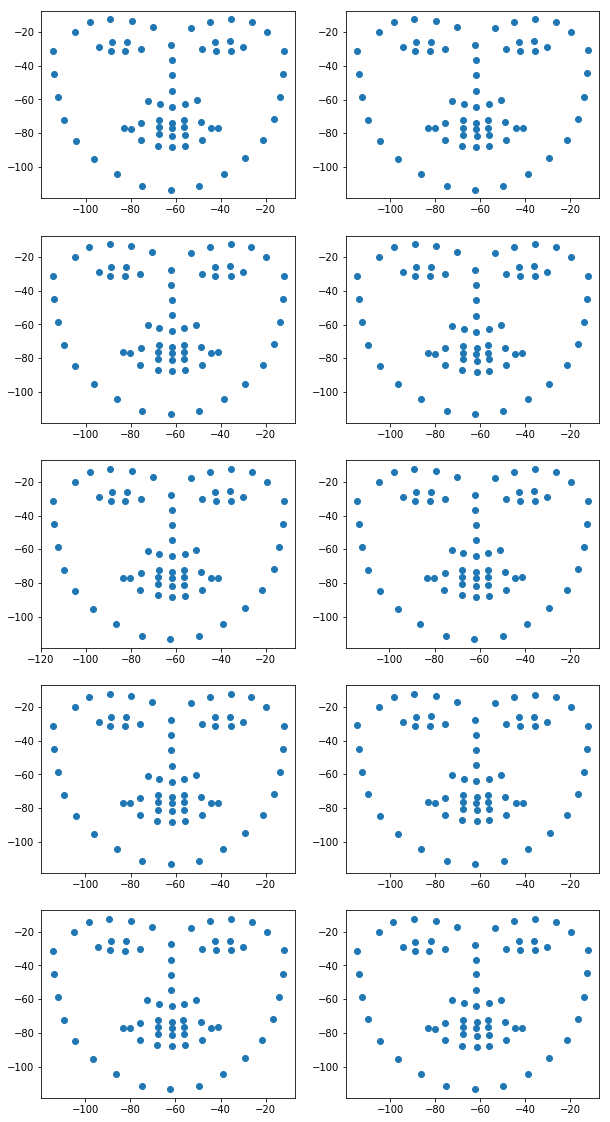

In [32]:
fig=plt.figure(figsize=(10, 20))
for i in range(1, 10+1):
    fig.add_subplot(5, 2, i)
    temp =(v_coordinates[:,i-1])+M_coordinates
    temp = np.reshape(temp, [68,2]) 
    temp_x = temp[:,0]
    temp_y = temp[:,1]
    plt.scatter(-temp_x, -temp_y)
    

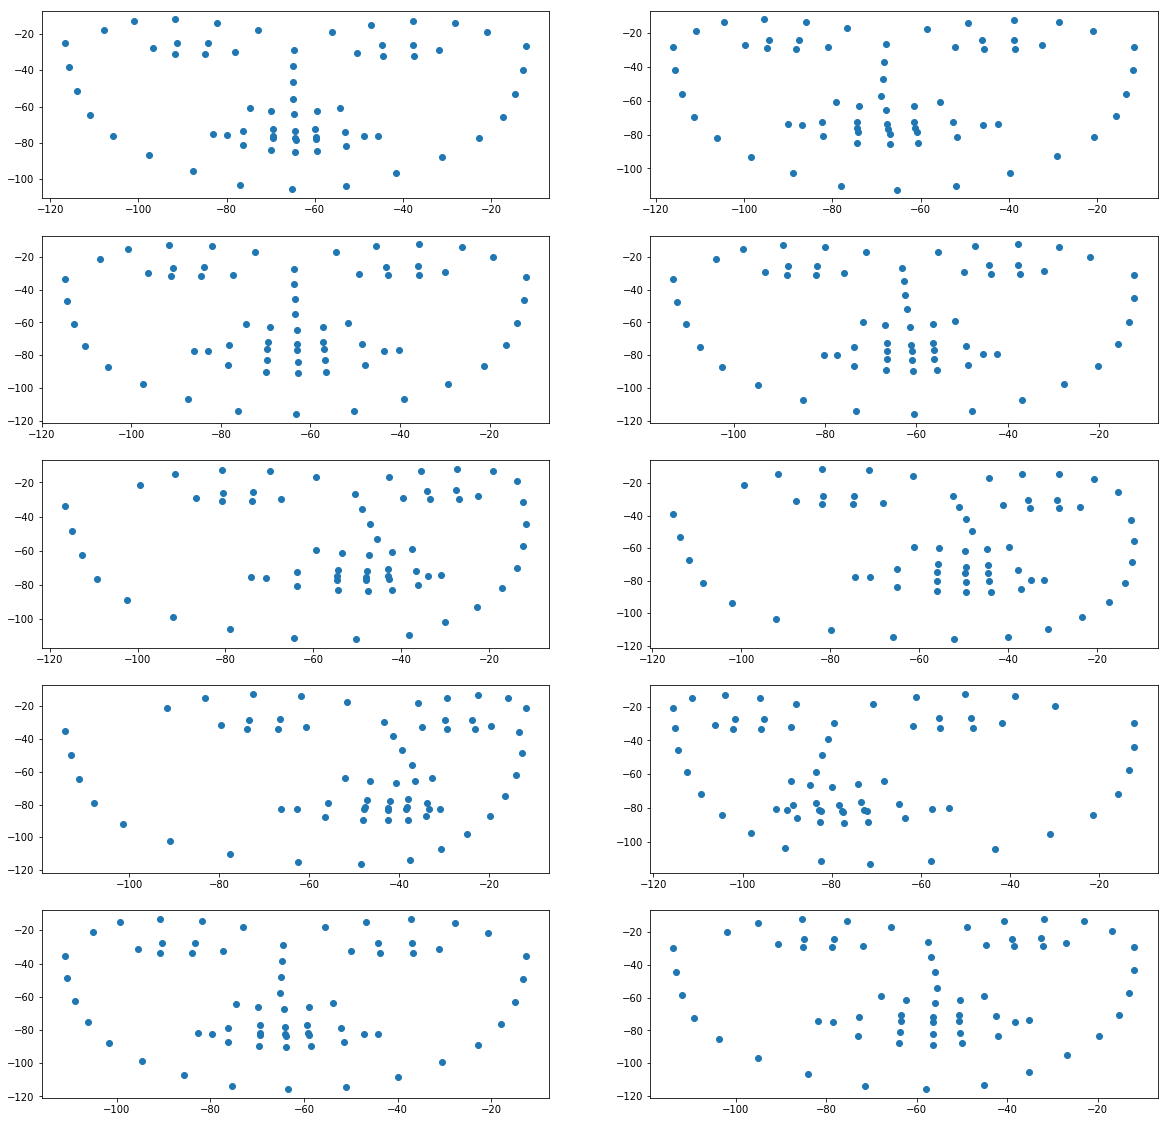

In [33]:
fig=plt.figure(figsize=(20, 20))
for i in range(1, 10 +1):
    fig.add_subplot(5, 2, i)
  #  plt.imshow(np.asarray(PImage.open('images/' + imagesList[i+799])))
    recons_temp = np.reshape(recons_10_coor[:,i-1], [68,2])
    recons_x_10 = recons_temp[:,0]
    recons_y_10 = recons_temp[:,1]
    plt.scatter(-recons_x_10, -recons_y_10)

In [34]:
from mywarper import *

In [35]:
combined_mean = np.stack((M_x,M_y),axis = 1)
image_train = np.zeros((16384, 800))
for i in range(0,800):
    orig_img_reconstruction = np.asarray(PImage.open('images/' + imagesList[i]))
 
    combined_data = np.stack((x_train[:,i],y_train[:,i]), axis = 1)
    warp_image = warp(orig_img_reconstruction, combined_data, combined_mean)
    warp_image = skimage.color.rgb2hsv(warp_image)
    warp_image = np.asarray(warp_image[:,:,2])
    warp_image = warp_image.flatten()
    image_train[:,i] = warp_image 

/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


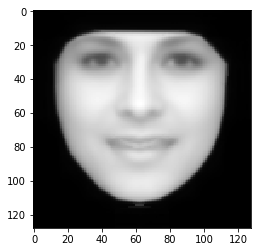

In [36]:
M_aligned = np.mean(image_train,axis = 1)
mean_face_aligned = np.reshape(M_aligned, [128,128])
plt.imshow(mean_face_aligned, cmap='gray')

In [37]:
image_train_m = np.zeros((16384, 800))
for i in range(0,800):
    image_train_m[:,i] = image_train[:,i] - M_aligned
print(image_train_m.shape)

(16384, 800)


In [179]:
c_aligned = np.matmul(image_train_m,np.transpose(image_train_m))

In [121]:
w_aligned,v_aligned = np.linalg.eig(c_aligned)

In [43]:
recons_coor_1023 = recons_10_coor


In [44]:
image_test = np.zeros((16384,200))
for i in range(0,200):
    orig_img_reconstruction = np.asarray(PImage.open('images/' + imagesList[i+800]))
    
    combined_data = np.stack((x_test[:,i],y_test[:,i]), axis = 1)
    warp_image_2 = warp(orig_img_reconstruction, combined_data, combined_mean)
    warp_image_3 = skimage.color.rgb2hsv(warp_image_2)
    warp_image_3 = np.asarray(warp_image_3[:,:,2])
    warp_image_3 = warp_image_3.flatten()
    image_test[:,i] = warp_image_3

In [45]:
eigen = v_aligned[:,0:50]
reconstructed_face_no_warp = np.zeros((16384,200))

for i in range(0,200):
    

    theta3 = image_test[:,i]-M_aligned
    alpha = np.dot(theta3, eigen)
    for j in range(0,50):
        temp = eigen[:,j].real
        reconstructed_face_no_warp[:,i] += alpha[j].real*(temp)
    reconstructed_face_no_warp[:,i] = reconstructed_face_no_warp[:,i] + M_aligned



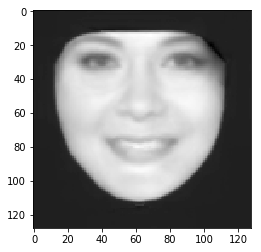

In [46]:
plt.imshow(np.reshape(reconstructed_face_no_warp[:,10],[128,128]), cmap = 'gray')

In [47]:
final_image = np.zeros((16384,200))
for i in range(0,200):
    coordinates_temp = recons_coor_1023[:,i]
    coordinates_temp = np.reshape(coordinates_temp, [68,2])
    warp_image_3 = reconstructed_face_no_warp[:,i]
    warp_image_3 = np.expand_dims(np.reshape(warp_image_3,[128,128]), axis = 2) 

    warp_image_3 = warp(warp_image_3, combined_mean, coordinates_temp)
    final_image[:,i] = warp_image_3.flatten()
    
    

In [48]:
a = final_image-X_real
temp_loss = np.square(a)/16384
temp_loss = (np.sum(temp_loss)/200)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

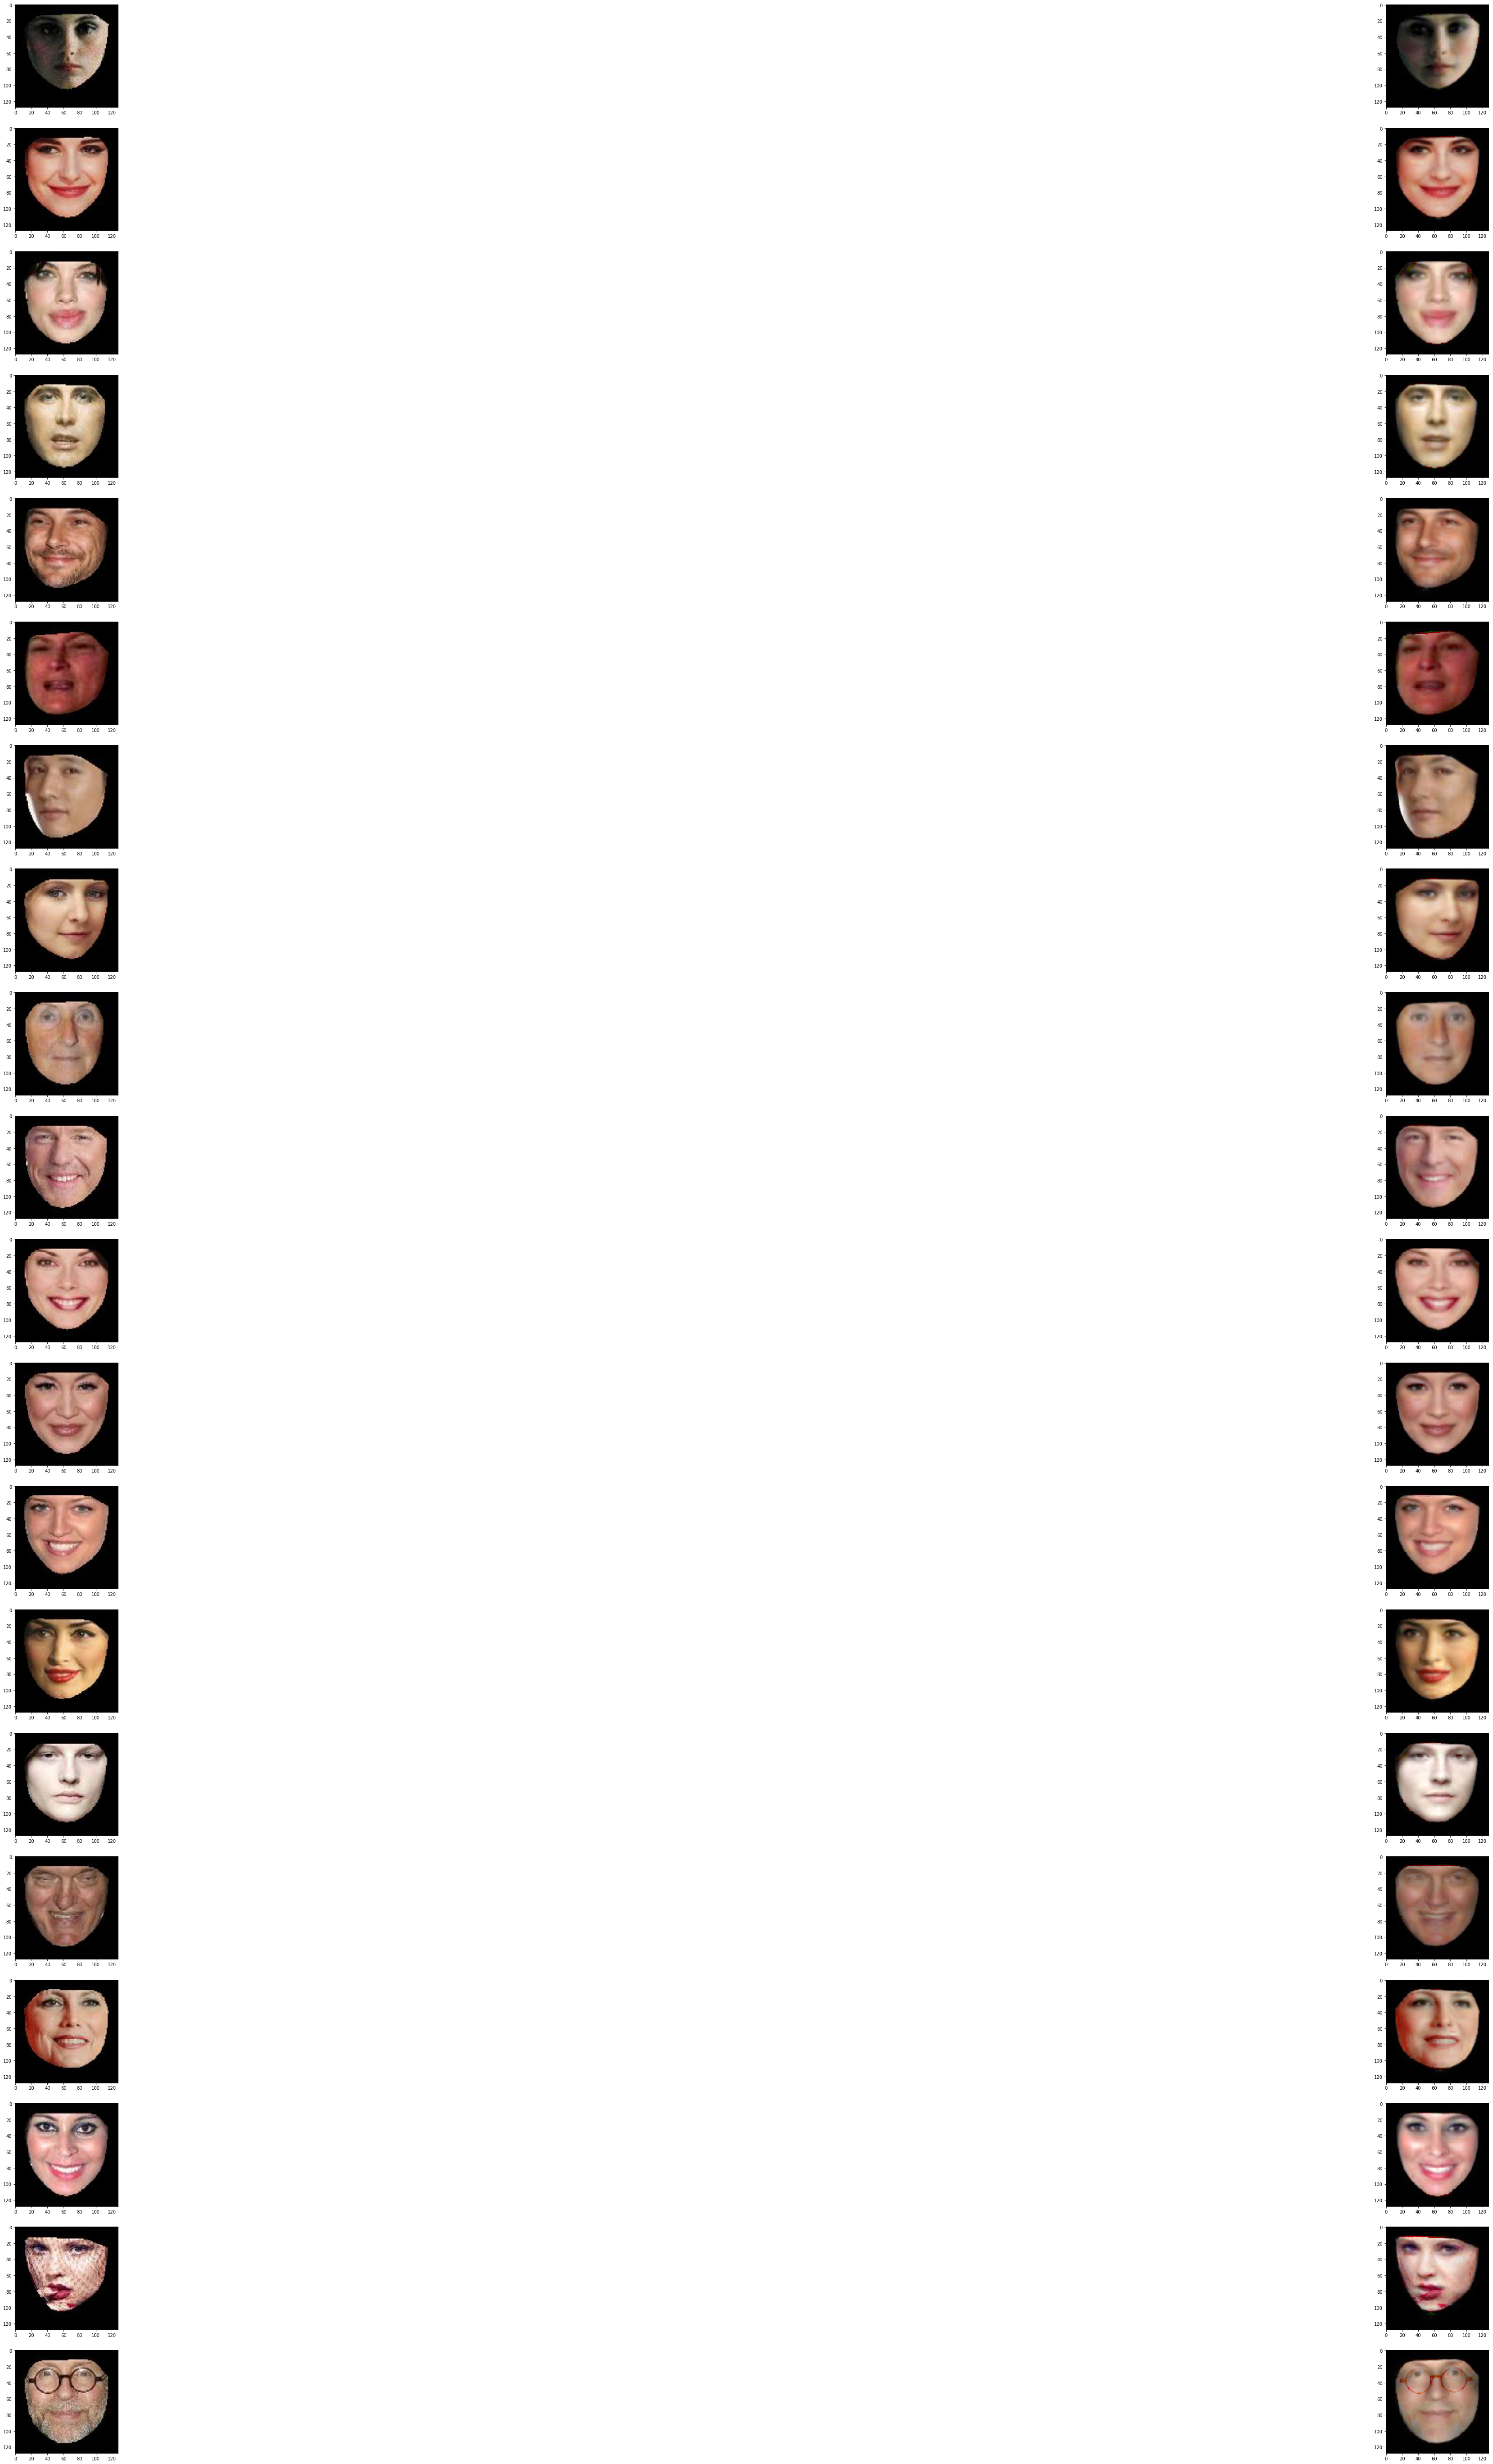

In [49]:
fig=plt.figure(figsize=(100, 100))
count = 1
for i in range(1, 20 +1):
    image = np.asarray(PImage.open('images/' + imagesList[i+799]))
    image2 = skimage.color.rgb2hsv(image)
    image2[:,:,2] = np.reshape(final_image[:,i-1],[128,128])
    image2 = skimage.color.hsv2rgb(image2)
    
    
    fig.add_subplot(20,2,count)
    
    plt.imshow(image)
    count+=1


   
    fig.add_subplot(20, 2, count)
    count +=1
    plt.imshow(image2)
    

In [188]:
sample = list(range(0,51,5))
sample[0] +=1    
print(sample)

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


In [189]:
loss = list()
reconstructed_matrix = np.zeros((16384,200))

for k in sample:
    count = 0
    eigen = v_aligned[:,0:k]
    reconstructed_face_no_warp = np.zeros((16384,200))
    for i in range(0,200):
        theta3 = image_test[:,i]-M_aligned
        alpha = np.dot(theta3, eigen)
        for j in range(0,k):
            temp = eigen[:,j].real
            reconstructed_face_no_warp[:,i] += alpha[j].real*(temp)
        reconstructed_face_no_warp[:,i] = reconstructed_face_no_warp[:,i] + M_aligned
    final_image = np.zeros((16384,200))
    for i in range(0,200):
        
        coordinates_temp = recons_coor_1023[:,i]
        coordinates_temp = np.reshape(coordinates_temp, [68,2])
        warp_image_3 = reconstructed_face_no_warp[:,i]
        warp_image_3 = np.expand_dims(np.reshape(warp_image_3,[128,128]), axis = 2) 

        warp_image_3 = warp(warp_image_3, combined_mean,coordinates_temp)
        final_image[:,i] = warp_image_3.flatten()
        
  
        
    temp_loss = X_real - final_image
    temp_loss = np.square(temp_loss)/16384
    loss.append(np.sum(temp_loss)/200)

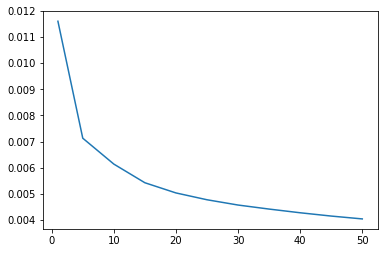

In [191]:
plt.plot(sample, loss)

In [50]:
eigenvalue_aligned = w_aligned

In [51]:
eigen_coordinates_2 = w_coordinates

In [52]:
trial_a = np.zeros((16384, 50))
trial_coor = np.zeros((136, 50))


eigen_vec = v_aligned[:,0:50]

for k in range(0,50):
    
    


    alpha = list()
    alpha_coor_trial = list()

    for i in range(0,50):
        alpha.append(np.random.normal(0,np.sqrt(eigenvalue_aligned[i]))/50)

    for j in range(0,10):
        alpha_coor_trial.append(np.random.normal(0, np.sqrt(w_coordinates[j])/30))




    for h in range(0,50):
        temp = eigen_vec[:,h].real


        trial_a[:,k] += alpha[h]*(temp)
    trial_a[:,k] = trial_a[:,k] + M_aligned

    for m in range(0,10):
        tempx = v_coordinates[:,m]
        


        trial_coor[:,k] += alpha_coor_trial[m]*(tempx)
        
    trial_coor[:,k] = trial_coor[:,k] + M_coordinates




    


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [53]:
final = np.zeros((16384, 50))
for i in range(0, 50):

    
    trial_temp = np.reshape(trial_a[:,i],[128,128]) 
    trial_temp = np.expand_dims(trial_temp, axis = 2) 
    final_temp = warp(trial_temp, combined_mean, np.reshape(trial_coor[:,i], [68,2]))
    final[:,i] = final_temp.flatten()

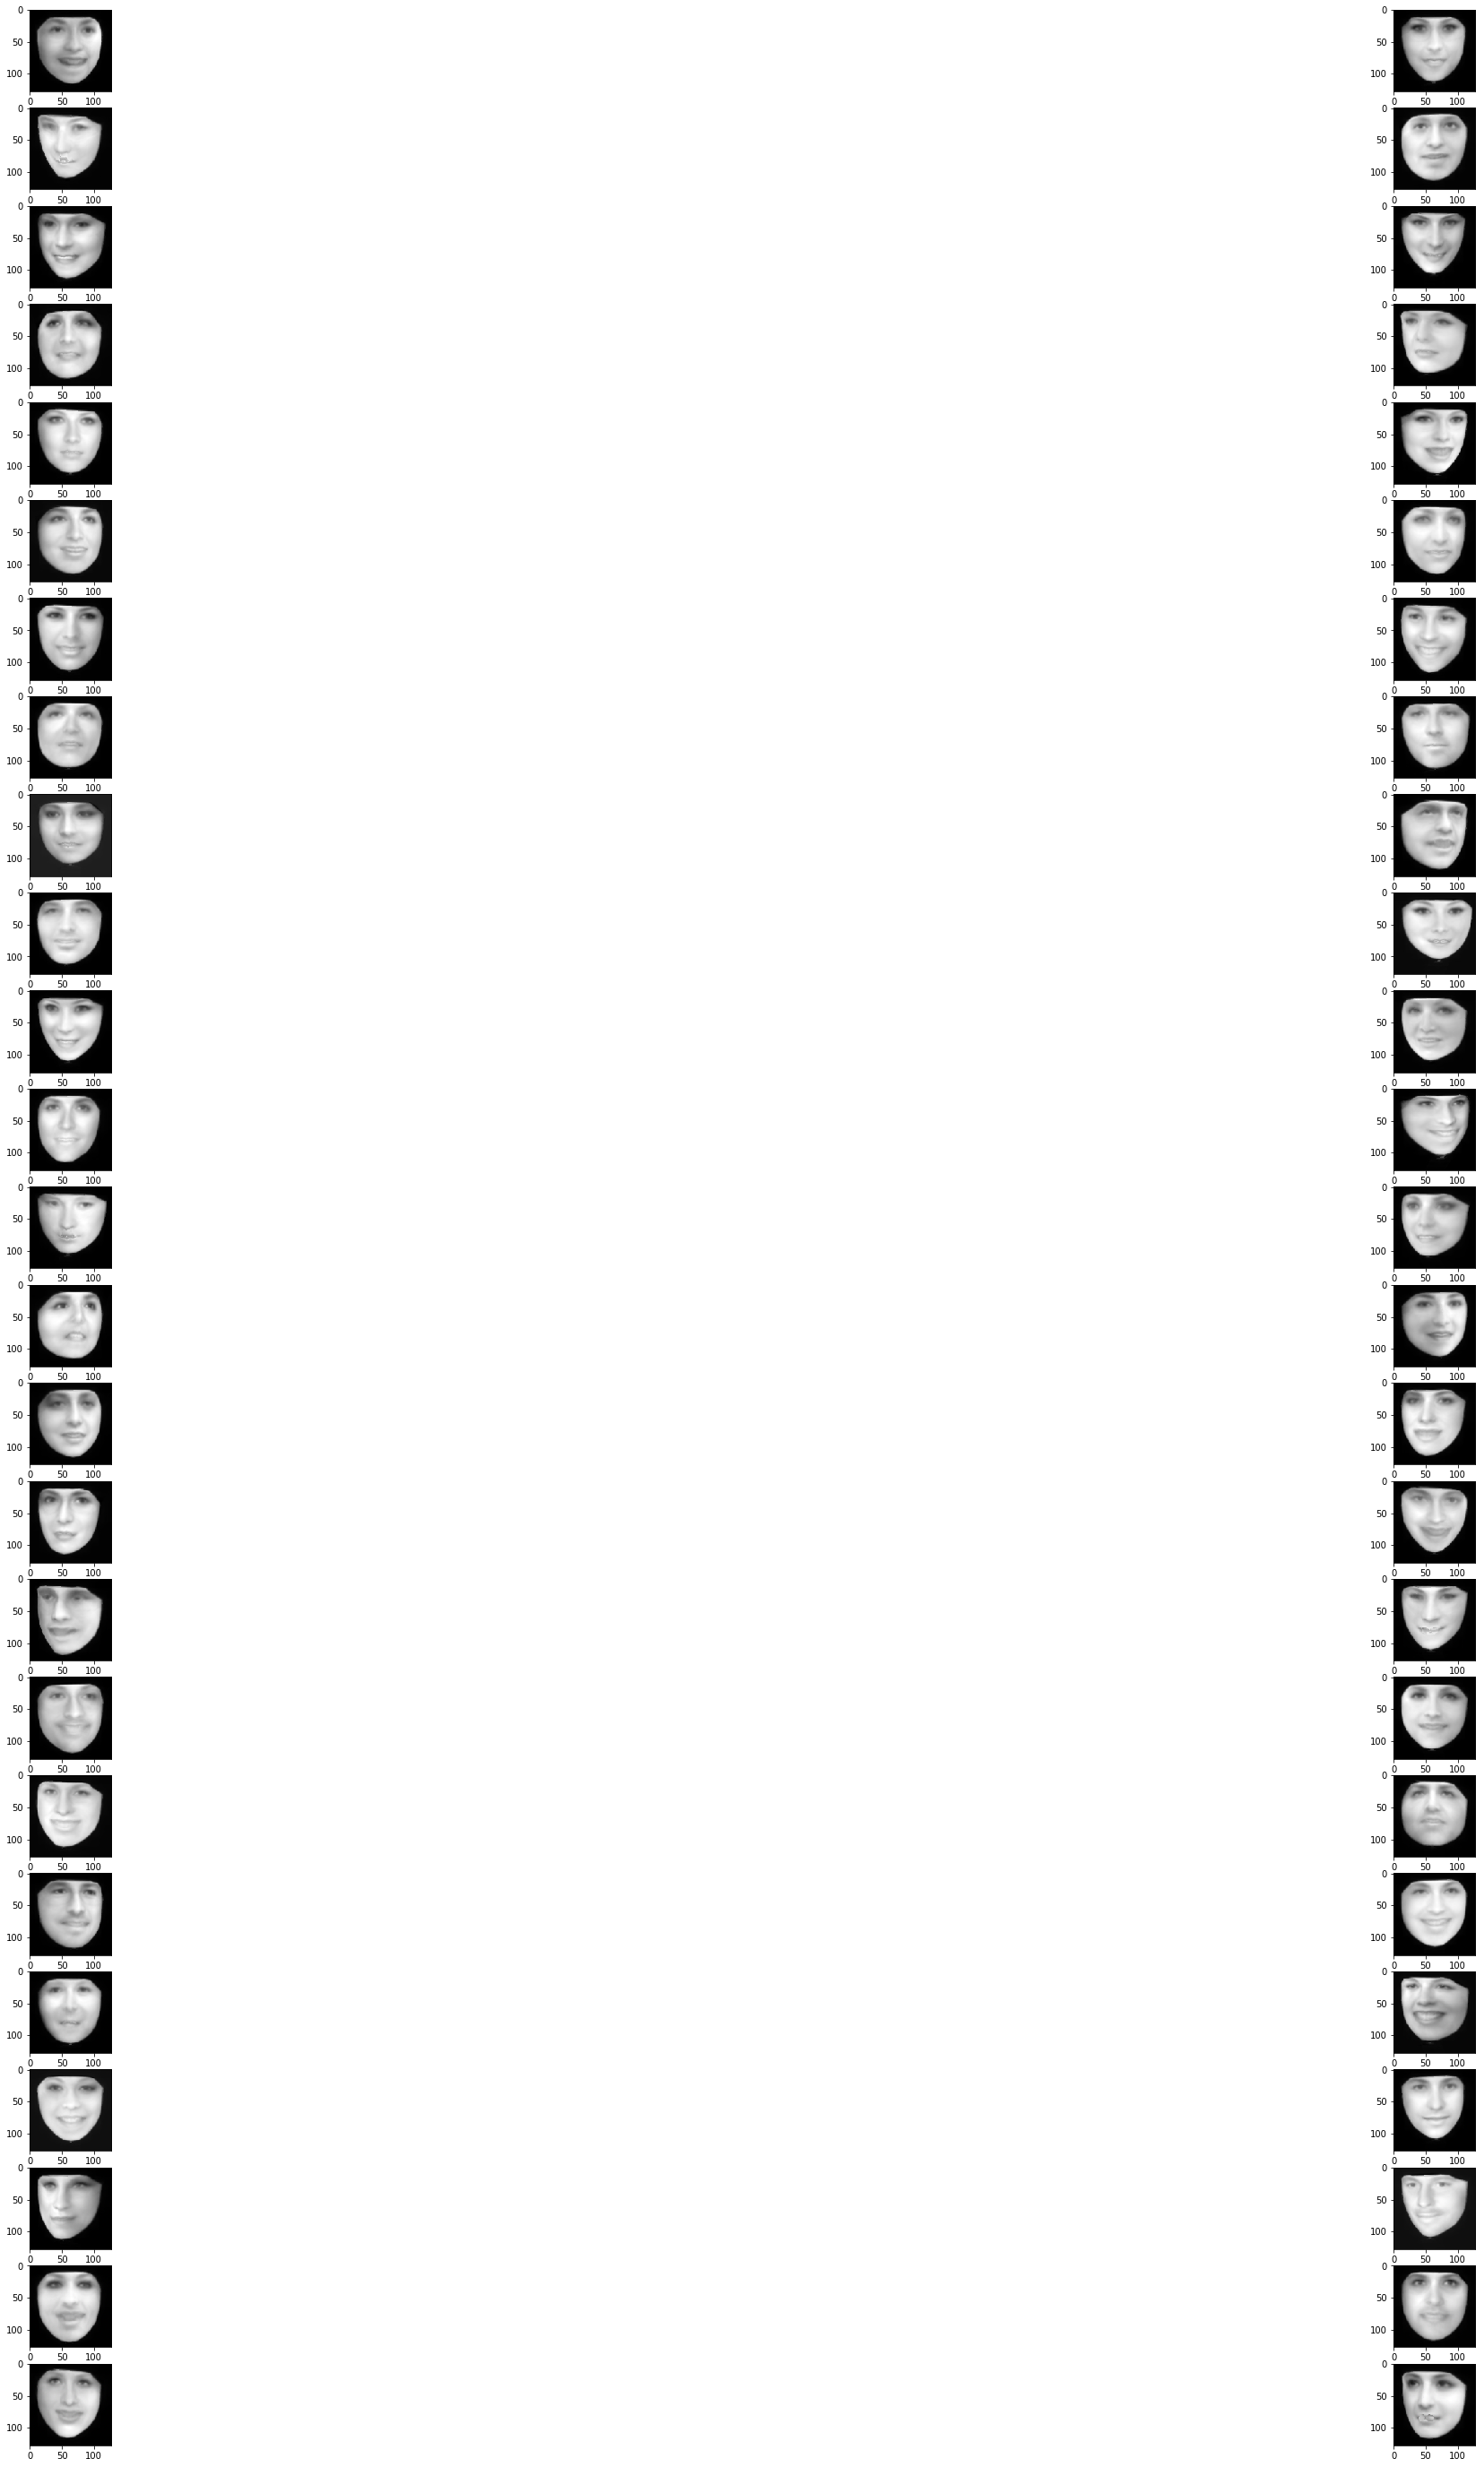

In [54]:
fig=plt.figure(figsize=(50, 50))

for i in range(1, 50 +1):
    
    
    
    fig.add_subplot(25,2,i)
    
    plt.imshow(np.reshape(final[:,i-1], [128,128]),cmap = 'gray')
    


In [55]:
#STARTING of Question 3 FLD

maleList = listdir('male_images/')
img = PImage.open('male_images/' + maleList[0])

In [56]:
training_maleList = maleList[0:335]
testing_maleList = maleList[335:412]

In [57]:
maleLandmarkList = listdir('male_landmarks/')

In [58]:
training_male = np.zeros((16384, 335))
for i in range(0,335):
    a = PImage.open('male_images/' + training_maleList[i])
    a = skimage.color.rgb2hsv(a)
    a = np.asarray(a[:,:,2])
    a = a.flatten()
    training_male[:,i] = a
    

In [59]:
train_male_landmark = np.zeros((136, 335))
test_male_landmark= np.zeros((136, 77))
for i in range(0, 335):
    mat = scipy.io.loadmat('male_landmarks/' + maleLandmarkList[i])
    train_male_landmark[:,i] = mat['lms'].flatten()
for i in range(0, 77):
    mat = scipy.io.loadmat('male_landmarks/' + maleLandmarkList[i+335])
    test_male_landmark[:,i] = mat['lms'].flatten()


In [60]:
testing_male = np.zeros((16384, 77))
for i in range(0,77):
    a = PImage.open('male_images/' + testing_maleList[i])
    a = skimage.color.rgb2hsv(a)
    a = np.asarray(a[:,:,2])
    a = a.flatten()
    testing_male[:,i] = a

In [61]:
femaleList = listdir('female_images/')
training_femaleList = femaleList[0:465]
testing_femaleList = femaleList[465:588]

In [62]:
training_female = np.zeros((16384, 465))
for i in range(0,465):
    a = PImage.open('female_images/' + training_femaleList[i])
    a = skimage.color.rgb2hsv(a)
    a = np.asarray(a[:,:,2])
    a = a.flatten()
    training_female[:,i] = a
    

In [63]:
testing_female = np.zeros((16384, 123))
for i in range(0,123):
    a = PImage.open('female_images/' + testing_femaleList[i])
    a = skimage.color.rgb2hsv(a)
    a = np.asarray(a[:,:,2])
    a = a.flatten()
    testing_female[:,i] = a

In [64]:
femaleLandmarkList = listdir('female_landmarks/')

In [65]:
train_female_landmark = np.zeros((136, 465))
test_female_landmark= np.zeros((136, 123))
for i in range(0, 465):
    mat = scipy.io.loadmat('female_landmarks/' + femaleLandmarkList[i])
    train_female_landmark[:,i] = mat['lms'].flatten()
for i in range(0, 123):
    mat = scipy.io.loadmat('female_landmarks/' + femaleLandmarkList[i+465])
    test_female_landmark[:,i] = mat['lms'].flatten()


In [66]:
for i in range(0,335):
    temp = np.reshape(training_male[:,i], [128,128,1])
    coor_temp = np.reshape(train_male_landmark[:,i], [68,2])
    temp = warp(temp, coor_temp, combined_mean)
    training_male[:,i] = temp.flatten()


In [67]:
for i in range(0,77):
    temp = np.reshape(testing_male[:,i], [128,128,1])
    coor_temp = np.reshape(test_male_landmark[:,i], [68,2])
    temp = warp(temp, coor_temp, combined_mean)
    testing_male[:,i] = temp.flatten()


In [68]:
for i in range(0,465):
    temp = np.reshape(training_female[:,i], [128,128,1])
    coor_temp = np.reshape(train_female_landmark[:,i], [68,2])
    temp = warp(temp, coor_temp, combined_mean)
    training_female[:,i] = temp.flatten()


In [69]:
for i in range(0,123):
    temp = np.reshape(testing_female[:,i], [128,128,1])
    coor_temp = np.reshape(test_female_landmark[:,i], [68,2])
    temp = warp(temp, coor_temp, combined_mean)
    testing_female[:,i] = temp.flatten()


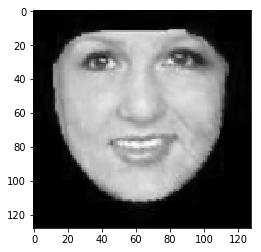

In [70]:
temp2 = np.reshape(training_female[:,464], [128,128])
plt.imshow(temp2, cmap= 'gray')

In [71]:
eigen = v_aligned[:,0:50]
alphas_male_train = list()

for i in range(0,335):
    
    theta3 = training_male[:,i]-M_aligned
    alpha = np.dot(theta3, eigen)
    alphas_male_train.append(alpha)


In [72]:
alphas_male_train = np.asarray(alphas_male_train)

In [73]:
eigen = v_aligned[:,0:50]
alphas_female_train = list()

for i in range(0,465):
    theta3 = training_female[:,i]-M_aligned
    alpha = np.dot(theta3, eigen)
    alphas_female_train.append(alpha)
alphas_female_train = np.asarray(alphas_female_train)

In [74]:
eigen_coor = v_coordinates[:,0:10]
alphas_male_coor_train = list()

for i in range(0,335):
    theta_coordinates = train_male_landmark[:,i] - M_coordinates
    alpha_coor = np.dot(theta_coordinates, eigen_coor)
    
    alphas_male_coor_train.append(alpha_coor)

In [75]:
eigen_coor = v_coordinates[:,0:10]
alphas_female_coor_train = list()

for i in range(0,465):
    theta_coordinates = train_female_landmark[:,i] - M_coordinates
    alpha_coor = np.dot(theta_coordinates, eigen_coor)
    
    alphas_female_coor_train.append(alpha_coor)

In [76]:
alphas_male_coor_train = np.asarray(alphas_male_coor_train)
alphas_female_coor_train = np.asarray(alphas_female_coor_train)

In [77]:
final_male_x_train = np.zeros((60,335))
final_female_x_train = np.zeros((60,465))

for i in range(0,335):
    final_male_x_train[:,i] = np.concatenate([alphas_male_train[i].real, alphas_male_coor_train[i].real])


In [78]:
for i in range(0,465):
    final_female_x_train[:,i] = np.concatenate([alphas_female_train[i].real, alphas_female_coor_train[i].real])


In [79]:
eigen = v_aligned[:,0:50]
alphas_male_test= list()

for i in range(0,77):
    
    theta3 = testing_male[:,i]-M_aligned
    alpha = np.dot(theta3, eigen)
    alphas_male_test.append(alpha)

eigen_coor = v_coordinates[:,0:10]
alphas_male_coor_test = list()

for i in range(0,77):
    theta_coordinates = test_male_landmark[:,i] - M_coordinates
    alpha_coor = np.dot(theta_coordinates, eigen_coor)
    
    alphas_male_coor_test.append(alpha_coor)

In [80]:
eigen = v_aligned[:,0:50]
alphas_female_test= list()

for i in range(0,123):
    
    theta3 = testing_female[:,i]-M_aligned
    alpha = np.dot(theta3, eigen)
    alphas_female_test.append(alpha)

eigen_coor = v_coordinates[:,0:10]
alphas_female_coor_test = list()

for i in range(0,123):
    theta_coordinates = test_female_landmark[:,i] - M_coordinates
    alpha_coor = np.dot(theta_coordinates, eigen_coor)
    
    alphas_female_coor_test.append(alpha_coor)

In [81]:
final_male_x_test = np.zeros((60,335))
final_female_x_test = np.zeros((60,465))

for i in range(0,77):
    final_male_x_test[:,i] = np.concatenate([alphas_male_test[i].real, alphas_male_coor_test[i].real])
for i in range(0,123):
    final_female_x_test[:,i] = np.concatenate([alphas_female_test[i].real, alphas_female_coor_test[i].real])


In [82]:
mean_male = np.mean(final_male_x_train, axis = 1)

mean_female = np.mean(final_female_x_train, axis = 1)

In [83]:
mean_multiplied =  np.outer(mean_male, np.ones(335))

S_male = np.matmul(final_male_x_train -  mean_multiplied, np.transpose(final_male_x_train - mean_multiplied))   

In [84]:
mean_multiplied =  np.outer(mean_female, np.ones(465))
S_female = np.matmul(final_female_x_train -  mean_multiplied, np.transpose(final_female_x_train - mean_multiplied))

In [85]:
Sw = S_male + S_female

w = np.matmul(np.linalg.inv(Sw), mean_male - mean_female)

In [86]:
threshold = np.dot(w, 0.5*(mean_male + mean_female))

In [87]:
y_male_predict =list()
for i in range(0,77):
    y_male_predict.append(np.matmul(np.transpose(w), final_male_x_test[:,i]))


In [88]:
correct_male = sum(i > threshold for i in y_male_predict)

In [89]:
y_female_predict =list()
for i in range(0,123):
    y_female_predict.append(np.matmul(np.transpose(w), final_female_x_test[:,i]))
correct_female = sum(i < threshold for i in y_female_predict)


In [90]:
accuracy = (correct_female + correct_male)/200


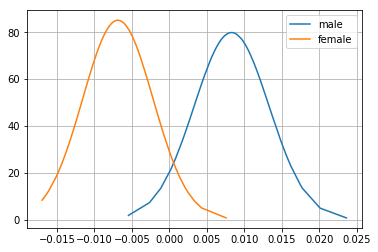

In [91]:
import matplotlib.mlab as mlab
import scipy.stats as stats
import pylab as pl

plt.figure()
mean_male_predict = np.mean(y_male_predict)
mean_female_predict = np.mean(y_female_predict)
std_female = np.std(y_female_predict)
std_male = np.std(y_male_predict)



(mu, sigma) = mean_male_predict, std_male
fit = stats.norm.pdf(sorted(y_male_predict), mu, sigma)
pl.plot(sorted(y_male_predict),fit,'-', label = 'male')



(mu, sigma) = mean_female_predict, std_female
fit = stats.norm.pdf(sorted(y_female_predict), mu, sigma)
pl.plot(sorted(y_female_predict),fit,'-', label='female')
plt.legend()
plt.grid()


In [92]:
mean_male_coor = np.mean(alphas_male_coor_train, axis = 0)
mean_female_coor = np.mean(alphas_female_coor_train, axis = 0)

mean_coor_multiplied =  np.outer(mean_male_coor, np.ones(335))


S_male_coor = np.matmul(alphas_male_coor_train.T -  mean_coor_multiplied,
                        np.transpose(alphas_male_coor_train.T - mean_coor_multiplied))
    

In [93]:
mean_coor_multiplied =  np.outer(mean_female_coor, np.ones(465))


S_female_coor = np.matmul(alphas_female_coor_train.T -  mean_coor_multiplied,
                        np.transpose(alphas_female_coor_train.T - mean_coor_multiplied))

In [94]:
Sw_coor = S_male_coor + S_female_coor

w_coor = np.matmul(np.linalg.inv(Sw_coor), mean_male_coor - mean_female_coor)

In [95]:
threshold_coor = np.dot(w_coor, 0.5*(mean_male_coor + mean_female_coor))


In [96]:
y_male_predict_coor =list()
for i in range(0,77):
    y_male_predict_coor.append(np.matmul(np.transpose(w_coor), alphas_male_coor_test[i]))

In [97]:
correct_male_coor = sum(i > threshold_coor for i in y_male_predict_coor)

In [98]:
y_female_predict_coor =list()
for i in range(0,123):
    y_female_predict_coor.append(np.matmul(np.transpose(w_coor), alphas_female_coor_test[i]))

correct_female_coor = sum(i < threshold_coor for i in y_female_predict_coor)

In [99]:
accuracy = (correct_female_coor + correct_male_coor)/200


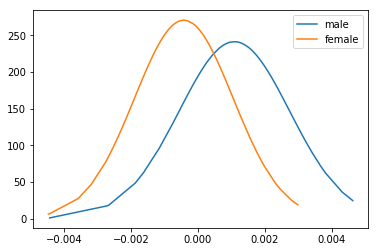

In [100]:
import matplotlib.mlab as mlab
import scipy.stats as stats
import pylab as pl

plt.figure()
mean_male_predict_coor = np.mean(y_male_predict_coor)
mean_female_predict_coor = np.mean(y_female_predict_coor)
std_female_coor = np.std(y_female_predict_coor)
std_male_coor = np.std(y_male_predict_coor)




(mu, sigma) = mean_male_predict_coor, std_male_coor
fit = stats.norm.pdf(sorted(y_male_predict_coor), mu, sigma)
pl.plot(sorted(y_male_predict_coor),fit,'-', label = 'male')



(mu, sigma) = mean_female_predict_coor, std_female_coor
fit = stats.norm.pdf(sorted(y_female_predict_coor), mu, sigma)
pl.plot(sorted(y_female_predict_coor),fit,'-', label= 'female')

plt.legend()




In [101]:
mean_male_app = np.mean(alphas_male_train, axis = 0)

mean_female_app = np.mean(alphas_female_train, axis = 0)
mean_app_multiplied =  np.outer(mean_male_app, np.ones(335))


S_male_app = np.matmul(alphas_male_train.T -  mean_app_multiplied,
                        np.transpose(alphas_male_train.T - mean_app_multiplied))

In [102]:
mean_app_multiplied =  np.outer(mean_female_app, np.ones(465))


S_female_app = np.matmul(alphas_female_train.T -  mean_app_multiplied,
                        np.transpose(alphas_female_train.T - mean_app_multiplied))

In [103]:

Sw_app = S_male_app + S_female_app

w_app = np.matmul(np.linalg.inv(Sw_app), mean_male_app - mean_female_app)

In [104]:
threshold_app = np.dot(w_app, 0.5*(mean_male_app + mean_female_app))


In [105]:
y_male_predict_app =list()
for i in range(0,77):
    y_male_predict_app.append(np.matmul(np.transpose(w_app), alphas_male_test[i]))


In [106]:
correct_male_app= sum(i > threshold_app for i in y_male_predict_app)

In [107]:
y_female_predict_app =list()
for i in range(0,123):
    y_female_predict_app.append(np.matmul(np.transpose(w_app), alphas_female_test[i]))

correct_female_app = sum(i < threshold_app for i in y_female_predict_app)

In [108]:
accuracy = (correct_female_app + correct_male_app)/200


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


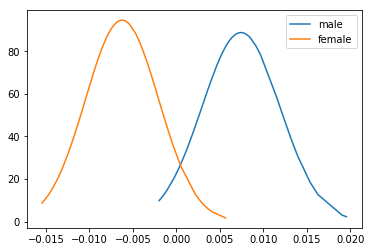

In [109]:
import matplotlib.mlab as mlab
import scipy.stats as stats
import pylab as pl

plt.figure()
mean_male_predict_app =  np.mean(y_male_predict_app)
mean_female_predict_app = np.mean(y_female_predict_app)
std_female_app = np.std(y_female_predict_app)
std_male_app = np.std(y_male_predict_app)




(mu, sigma) = mean_male_predict_app, std_male_app
fit = stats.norm.pdf(sorted(y_male_predict_app), mu, sigma)
pl.plot(sorted(y_male_predict_app),fit,'-', label = 'male')



(mu, sigma) = mean_female_predict_app, std_female_app
fit = stats.norm.pdf(sorted(y_female_predict_app), mu, sigma)
pl.plot(sorted(y_female_predict_app),fit,'-', label = 'female')

plt.legend()


/home/punyawiwat2/miniconda2/envs/myenv/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


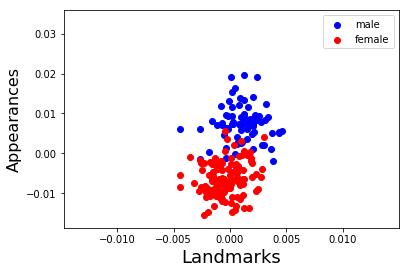

In [110]:
plt.scatter(y_male_predict_coor, y_male_predict_app, c='blue', label='male')
plt.scatter(y_female_predict_coor, y_female_predict_app,c='red', label='female')

plt.xlabel('Landmarks', fontsize=18)
plt.ylabel('Appearances', fontsize=16)
plt.legend()